In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
#load csv file as pandas dataframe
df = pd.read_csv('Telco Customer Churn.csv')

In [ ]:
# Get the dataframe's info 
# (number of rows, column name & type, number of missing rows per column, memory usage)
df.info()

In [ ]:
#mengecek apakah benar2 missing values tidak ada (untuk data numerical : 'TotalCharges')
x = df.sort_values(by=['TotalCharges'])
x.head(15)

#Ada missing value

In [ ]:
#mengecek apakah benar2 missing values tidak ada (untuk data numerical : 'tenure')
x = df.sort_values(by=['tenure'])
x.head(5)

#no missing value

In [ ]:
#mengecek apakah benar2 missing values tidak ada (untuk data numerical : 'MonthlyCharges')
x = df.sort_values(by=['MonthlyCharges'])
x.head(5)

#no missing value

In [ ]:
#Replace missing value in column 'TotalCharges' with 0 karena masing-masing customer yang tidak memiliki nilai pada TotalCharge memiliki tenure 0.
df['TotalCharges'] = df['TotalCharges'].apply(lambda x:0 if x ==' ' else x)

In [ ]:
#Mengubah type data 'TotalCharges' menjadi type data float (karena Total Charge seharusnya numerical data instead of object/string)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
#Mengubah type data object menjadi type data int supaya bisa dikalkulasi menggunakan Pearson Heatmap
df['Churn'] = df['Churn'].apply(lambda y:'1' if y == 'Yes' else '0')
df['PhoneService'] = df['PhoneService'].apply(lambda y:'1' if y == 'Yes' else '0')

In [ ]:
df['gender'] = df['gender'].apply(lambda y:'1' if y == 'Male' else '0')
df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda y:'1' if y == 'Yes' else '0')
df['Partner'] = df['Partner'].apply(lambda y:'1' if y == 'Yes' else '0')
df['Dependents'] = df['Dependents'].apply(lambda y:'1' if y == 'Yes' else '0')
df['InternetService'] = df['InternetService'].apply(lambda y:'0' if y == 'No' else ('1' if y == 'DSL' else '2'))
df['TechSupport'] = df['TechSupport'].apply(lambda y:'0' if y == 'No' else ('1' if y == 'Yes' else '2'))
df['MultipleLines'] = df['MultipleLines'].apply(lambda y:'0' if y == 'No' else ('1' if y == 'Yes' else '2'))
df['OnlineBackup'] = df['OnlineBackup'].apply(lambda y:'0' if y == 'No' else ('1' if y == 'Yes' else '2'))
df['OnlineSecurity'] = df['OnlineSecurity'].apply(lambda y:'0' if y == 'No' else ('1' if y == 'Yes' else '2'))
df['DeviceProtection'] = df['DeviceProtection'].apply(lambda y:'0' if y == 'No' else ('1' if y == 'Yes' else '2'))
df['StreamingTV'] = df['StreamingTV'].apply(lambda y:'0' if y == 'No' else ('1' if y == 'Yes' else '2'))
df['StreamingMovies'] = df['StreamingMovies'].apply(lambda y:'0' if y == 'No' else ('1' if y == 'Yes' else '2'))
df['Contract'] = df['Contract'].apply(lambda y:'0' if y == 'Month-to-month' else ('1' if y == 'One year' else '2'))
df['PaymentMethod'] = df['PaymentMethod'].apply(lambda y:'0' if y == 'Electronic check' else ('1' if y == 'Mailed check' else ('2' if y == 'Credit card (automatic)' else '3')))

In [ ]:
df['PhoneService'] = df['PhoneService'].astype(int)
df['Churn'] = df['Churn'].astype(int)
df['gender'] = df['gender'].astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].astype(int)
df['InternetService'] = df['InternetService'].astype(int)
df['Partner'] = df['Partner'].astype(int)
df['Dependents'] = df['Dependents'].astype(int)
df['TechSupport'] = df['TechSupport'].astype(int)
df['MultipleLines'] = df['MultipleLines'].astype(int)
df['OnlineBackup'] = df['OnlineBackup'].astype(int)
df['OnlineSecurity'] = df['OnlineSecurity'].astype(int)
df['DeviceProtection'] = df['DeviceProtection'].astype(int)
df['StreamingMovies'] = df['StreamingMovies'].astype(int)
df['StreamingTV'] = df['StreamingTV'].astype(int)
df['Contract'] = df['Contract'].astype(int)
df['PaymentMethod']  = df['PaymentMethod'] .astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
df = df.drop(columns = ['customerID'])

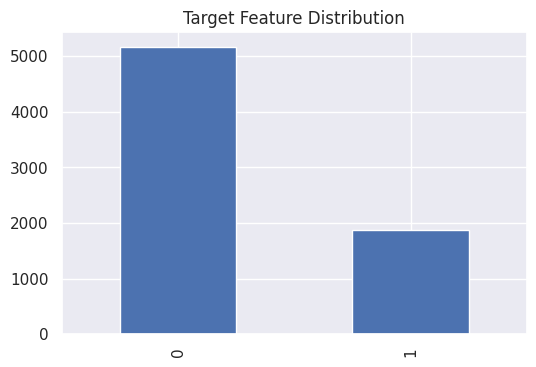

In [ ]:
df['Churn'].value_counts().plot(kind='bar')
plt.title("Target Feature Distribution")
plt.show()

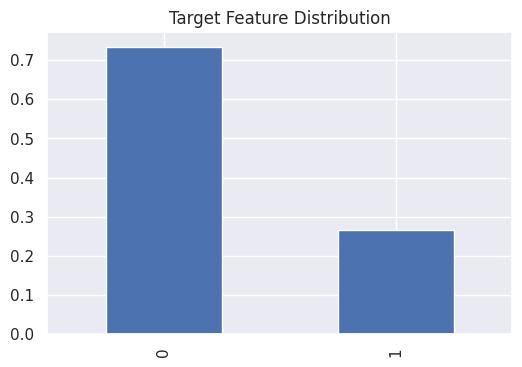

In [99]:
df['Churn'].value_counts(True).plot(kind='bar')
plt.title("Target Feature Distribution")
plt.show()

In [ ]:
df['gender'].value_counts(True).plot(kind='bar')
plt.title("Target Feature Distribution")
plt.show()

In [ ]:
df['Churn'].value_counts(True)
#perbandingan Churn : No Churn = 26.5:73.5

In [ ]:
df['SeniorCitizen'].value_counts(True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

In [ ]:
# Method to calculate the correlation matrix for all of the numerical columns
# default is pearson correlation
df_corr = df.corr()
df_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.000485,-0.010380,-0.003429,-0.002032,0.005092,0.000985,0.001156,-0.000191,0.000126,-0.011754,-0.011383,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,0.259390,-0.210897,-0.152780,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,0.156530,-0.090623,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,-0.000132,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.294806,-0.014877,0.143195,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,-0.179631,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,0.243187,-0.111377,0.120650,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,0.033230,0.145298,0.178651,0.178649,0.144459,0.136145,0.140781,0.671607,0.006152,0.343561,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,0.093720,0.125353,0.150338,0.138755,0.123350,0.171538,0.165205,0.002247,0.016505,0.001414,0.247398,0.113214,0.011942
MultipleLines,-0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,0.174989,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.078613,0.108230,0.029909,0.146153,0.250628,0.019423
InternetService,-0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.174989,1.000000,-0.764943,-0.686403,-0.682448,-0.760985,-0.617704,-0.620005,-0.290189,0.378108,-0.170820,0.905491,0.428963,0.316846
OnlineSecurity,-0.003429,-0.210897,0.081850,0.190523,0.145298,0.125353,-0.235021,-0.764943,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.389978,-0.334003,0.207970,-0.621227,-0.154380,-0.332819
OnlineBackup,-0.002032,-0.152780,0.087055,0.162445,0.178651,0.150338,-0.210372,-0.686403,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.351267,-0.262402,0.180480,-0.538454,-0.086220,-0.291449


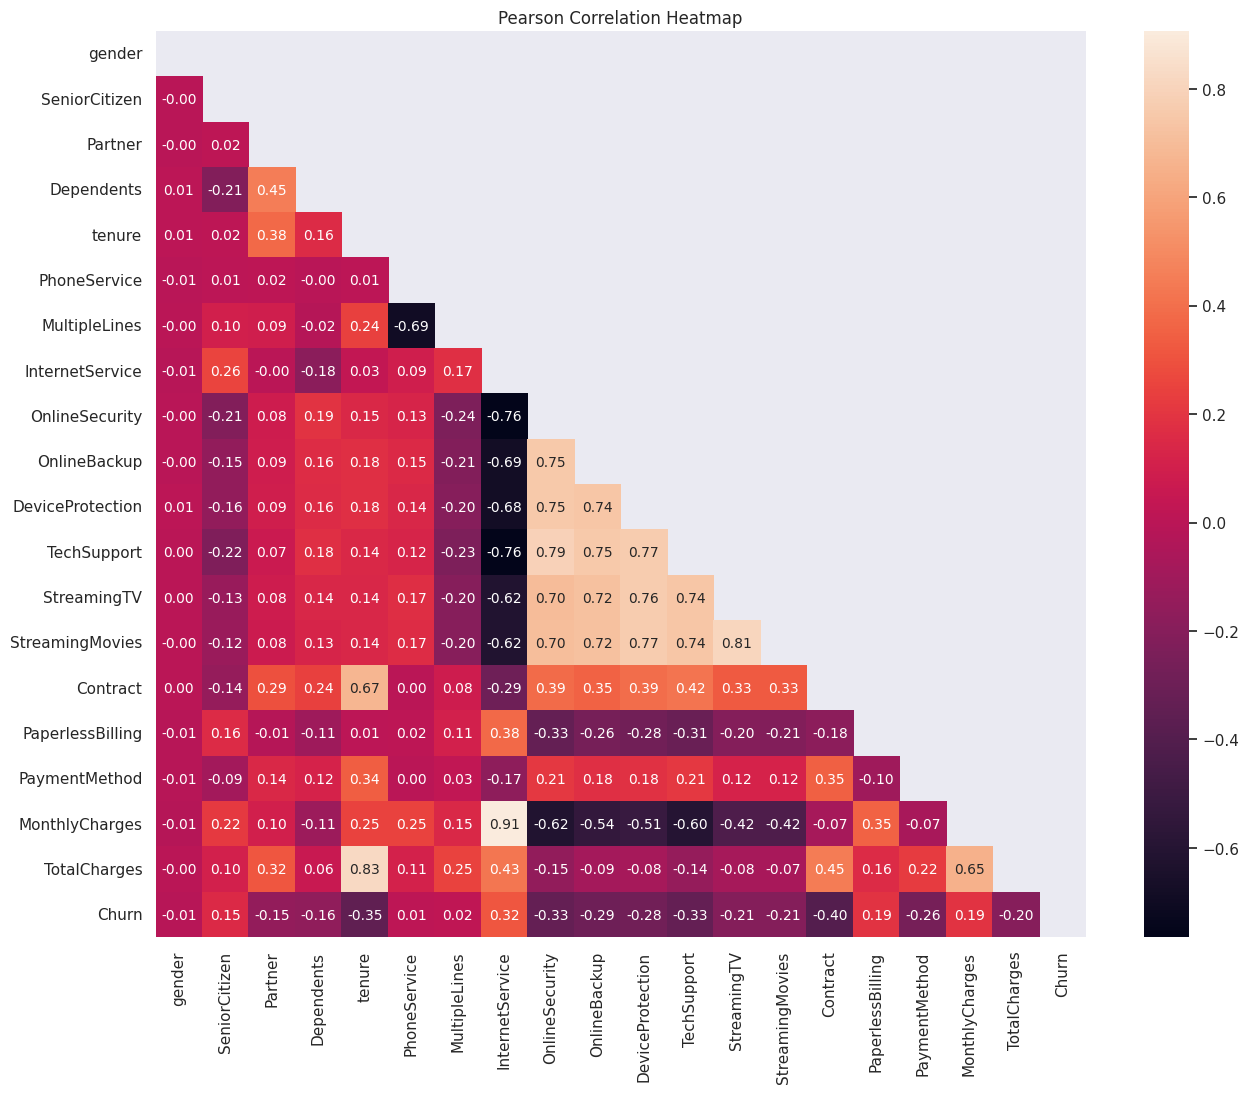

In [ ]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

*   InternetService and MonthlyCharges are good candidates of predictors.
*   However, they have a very high correlation (0.91) which means we have to choose which one of them will be used as predictor.
*   Refer to bar plot gender distribution is nearly balance and refer Pearson Heatmap the correlation for each variable nearly 0, means that gender is the worst candidates of predictors. 
*   TotalCharges and tenure have a high correlation (0.83), it make sense as TotalCharges will be equal to tenure for customer.
*   TechSupport and InternetService have a quite high negative correlation (-0.76), which makes sense because No internet Service (variable TechSupport) equals to No (Variable InternetService)
*   TechSupport and OnlineSecurity have a quite high negative correlation (-0.76), which makes sense because No internet Service (variable TechSupport) equals to No internet Service (Variable OnlineSecurity)

















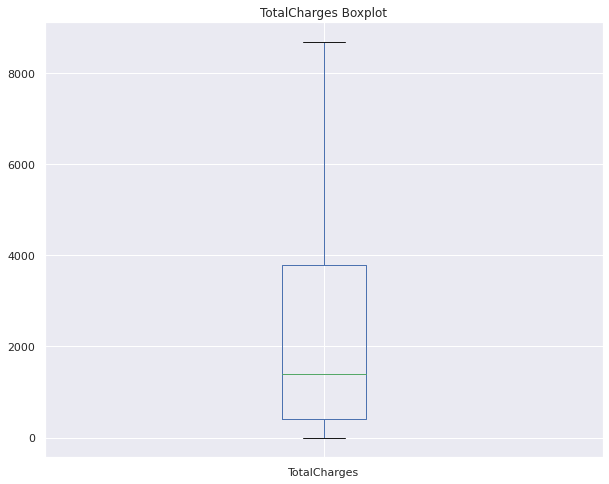

In [ ]:
df['TotalCharges'].plot(kind='box',figsize=(10,8))
plt.title("TotalCharges Boxplot")
plt.show()

#no outlier

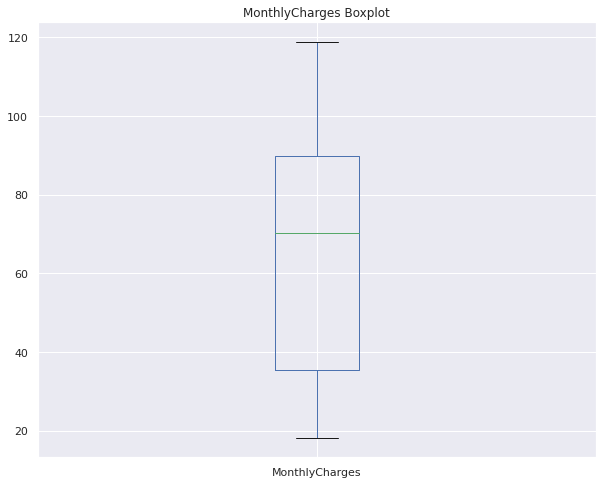

In [ ]:
df['MonthlyCharges'].plot(kind='box',figsize=(10,8))
plt.title("MonthlyCharges Boxplot")
plt.show()

#no outlier

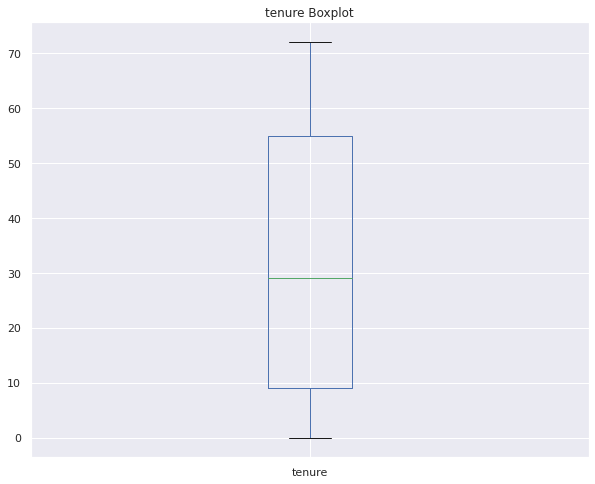

In [ ]:
df['tenure'].plot(kind='box',figsize=(10,8))
plt.title("tenure Boxplot")
plt.show()

#no outlier

In [ ]:
df.groupby(['InternetService'])[['Churn']].agg({'count','mean'})

Churn          
                count      mean
InternetService                
0                1526  0.074050
1                2421  0.189591
2                3096  0.418928

In [ ]:
#Most churn customer has Fiber optic InternetService 

In [ ]:
df.groupby(['TechSupport'])[['Churn']].agg({'count','mean'})

Churn          
            count      mean
TechSupport                
0            3473  0.416355
1            2044  0.151663
2            1526  0.074050

In [ ]:
#Most churn customer has No TechSupport, it makes sense as they will be churn if has no TechSupport

In [ ]:
df.groupby(['gender'])[['Churn']].agg({'count','mean'})

Churn          
       count      mean
gender                
0       3488  0.269209
1       3555  0.261603

In [ ]:
#gender distribution is nearly balanced.

In [ ]:
df.groupby(['OnlineSecurity'])[['Churn']].agg({'count','mean'})

Churn          
               count      mean
OnlineSecurity                
0               3498  0.417667
1               2019  0.146112
2               1526  0.074050

In [ ]:
#Most churn customer has No OnlineSecurity, it makes sense as they will be churn if has no OnlineSecurity

In [ ]:
!pip install -U pandas-profiling
!pip install sweetviz

     |████████████████████████████████| 261 kB 28.9 MB/s 
     |████████████████████████████████| 303 kB 52.6 MB/s 
     |████████████████████████████████| 102 kB 12.2 MB/s 
     |████████████████████████████████| 62 kB 948 kB/s 
     |████████████████████████████████| 596 kB 60.2 MB/s 
     |████████████████████████████████| 675 kB 59.6 MB/s 
     |████████████████████████████████| 10.1 MB 48.6 MB/s 
     |████████████████████████████████| 3.1 MB 54.1 MB/s 
     |████████████████████████████████| 812 kB 45.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=38f317cecbb82237ab67064345b9ed84fef70bc47d1bec3c9adf0947299ce8c6
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=da24f175ac42a166cd548885b46a9f714bf38b839ab9652cd0e7743762a122e1


     |████████████████████████████████| 15.1 MB 29.6 MB/s 


In [ ]:
import pandas as pd
from ipywidgets import widgets

#Import pandas_profiling
from pandas_profiling import ProfileReport

#Import Sweetviz
import sweetviz as sv

#Import RPy2
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import rpy2.robjects.packages as rpackages
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter
#Input the desired R packages
R_packages=['DataExplorer']
#Install the desired R packages
utils=rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)
for package in R_packages:
    if not(rpackages.isinstalled(package)):
        utils.install_packages(package)
#As a 'bridge' between python and R environment
r=robjects.r

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘plyr’, ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

In [ ]:
train_perc = 0.8

#This splitting methodology is not a best practice when we want to train a prediction model.
#However, in this case it is okay to use this methodology since we only want to compare the features
#of several data exploration package
df_train = df.loc[:round(train_perc*len(df)),:]
df_test = df.loc[1+round(train_perc*len(df)):,:]

In [ ]:
pandas_profiling_report = df_train.profile_report(
    title="Pandas Profiling Report", 
    explorative=True,  #More analysis (Unicode)
    html={'style': 
          {'full_width': True,
           'theme':'flatly'} #available theme options: ‘bootswatch’ ,'flatly','united'
        }, 
    interactions = {'targets' : ['Churn']} , #When a list of variable names is given, only interactions between these and all other variables are given.
    progress_bar=True)
pandas_profiling_report.to_file("pandas_profiling_report.html")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
sweetviz_report = sv.compare([df_train, "Training Data"], [df_test, "Test Data"],   "Churn")
sweetviz_report.show_html("sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#Import DataExplorer R Package
DataExplorer=rpackages.importr('DataExplorer')

#Convert Python object to R object
with localconverter(ro.default_converter + pandas2ri.converter):
  robjects.globalenv['df_train'] = ro.conversion.py2rpy(df_train)
#robjects.globalenv['Churn']=target

#Generate DataExplorer Report
r('create_report(df_train, report_title = "DataExplorer Report", output_file = "DataExplorer_report.html")')

R[write to console]: 

processing file: report.rmd



  |..                                                                    |   2%
   inline R code fragments

  |...                                                                   |   5%
label: global_options (with options) 
List of 1
 $ include: logi FALSE

  |.....                                                                 |   7%
  ordinary text without R code

  |.......                                                               |  10%
label: introduce
  |........                                                              |  12%
  ordinary text without R code

  |..........                                                            |  14%
label: plot_intro
  |............                                                          |  17%
  ordinary text without R code

  |.............                                                         |  19%
label: data_structure
  |...............                                                       |  21%
  ordinary text without R c

R[write to console]: output file: /content/gdrive/MyDrive/Colab Notebooks/report.knit.md




/usr/bin/pandoc +RTS -K512m -RTS '/content/gdrive/MyDrive/Colab Notebooks/report.knit.md' --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc6ad3562a572.html --self-contained --variable bs3=TRUE --standalone --section-divs --table-of-contents --toc-depth 6 --template /usr/lib/R/site-library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=yeti --include-in-header /tmp/RtmprVmGVM/rmarkdown-str6ad7cd69a0.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 


R[write to console]: 
Output created: DataExplorer_report.html



0
